# 3. 평가 지표와 측정 (Evaluation Indicators and Measurements)
- 지금까지 분류 성능 평가에 정확도(정확하게 분류된 샘플의 비율)를 사용했고, 회귀 성능 평가에는 R^2을 사용
- 그러나 주어진 데이터셋에 대한 지도 학습 모델의 성능을 재는 방법은 그 외에도 많음
- 실전에서 애플리케이션에 따라 이런 평가 지표가 적합하지 않을 수 있으므로, 모델을 선택하고 매개변수를 튜닝할 때 올바른 지표를 선택하는 것이 중요

## 3-1. 최종 목표를 기억하라
- 평가 지표를 선택할 때 머신러닝 애플리케이션의 최종 목표를 기억해야 함
- 실제로 정확한 예측을 만드는 것뿐 아니라 큰 의사 결정 프로세스의 일부로 사용하는 데 더 중점을 둬야 할 지 모름
- 머신러닝 평가 지표를 선택하기 전에 비즈니스 지표라고 부르는 애플리케이션의 고차원적인 목표를 생각해야 함
- 어떤 머신러닝 애플리케이션에서 특정 알고리즘을 선택하여 나타난 결과를 비즈니스 임팩트(Business Impact)라고 함
- 고차원적인 목표는 교통사고를 피하거나 입원 환자 수를 줄이는 것일지 모름
- 또는 더 많은 유저를 유입시키거나 쇼핑몰에서 사용자의 소비를 늘리는 것일 수 있음
- 모델을 선택하고 매개변수를 조정할 때, 이런 비즈니스 지표에 긍정적인 영향을 주는 모델과 매개변수를 선택해야 함
- 많은 경우에 특정 모델이 비즈니스에 미치는 영향은 실제 운영 시스템에 적용해야 알 수 있기 때문에 어려운 문제
- 개발 초기 단계에서 매개변수를 조정하기 위해 시험 삼아 모델을 운영 시스템에 곧바로 적용하기란 비즈니스적으로나 개인적으로나 위험부담이 커서 현실적으로 불가능함
- 자율 주행 자동차의 보행자 회피 기능을 먼저 검증하지 않고 실전에 투입하여 평가한다고 생각해봄
- 모델이 나쁘다면 보행자가 위험에 처하게되고, 그러므로 계산하기 쉬운 평가 지표를 이용한 대리 평가 방식을 종종 사용
- 예를 들면 보행자와 보행자가 아닌 이미지를 분류하는 테스트를 수행해서 정확도를 측정할 수 있음
- 이는 대체 방식이므로 평가가 가능하고 원래 비즈니스 목적에 가장 가까운 지표를 찾아야 함
- 이 근사 지표는 모델을 평가할 때나 선택할 때마다 사용해야 함
- 평가의 결과는 하나의 숫자가 아닐 수 있지만, 선택한 모델의 예상 비즈니스 임펙트를 나타내야 함
- 예를 들어 어떤 알고리즘을 적용하면 고객 수는 10% 늘지만 고객당 매출은 15% 줄어들 수 있음

## 3-2. 이진 분류의 평가 지표
- 이진 분류는 실전에서 가장 널리 사용하고 개변도 쉬운 머신러닝 알고리즘
- 하지만 이 간단한 작업을 평가하는 데에도 주의할 점이 많음
- 여러 평가 지표를 들여다보기 전에, 정확도를 잘못 측정하는 경우에 대해 살펴보겠음. 이진 분류에는 양성 클래스와 음성 클래스가 있으며 양성 클래스가 주요 관심 클래스 임

### 에러의 종류
- 잘못 분류한 샘플의 수가 원하는 정보의 전부는 아니므로, 정확도만으로 예측 성능을 측정하기에는 부족할 때가 종종 있음
- 자동화 테스트로 암을 조기 발견하는 애플리케이션을 가정
- 테스트가 음성이면 건강하다는 뜻, 반대로 양성이면 추가 검사를 받아야 함
- 여기서 양성 테스트(암 진단)를 양성 클래스라고 하고 음성 테스트를 음성 클래스라고 함
- 모델이 항상 완벽하게 작동하는 것은 아니니, 잘못 분류할 때가 있음
- 어떤 어플리캐이션에서든 이런 분류 오류가 실제 현실에서 어떤 결과를 초래하는지 살펴봐야 함
- 예컨데 건강한 사람을 양성으로 분류하면 추가 검사를 받게 할 것
- 이는 환자에게 비용 손실과 불편함을 가져다 줌
- 이와 같은 잘못된 양성 예측을 거짓 양성(False Positive)이라 함
- 반대로 암에 걸린 사람을 음성으로 분류하여 제대로 된 검사나 치료를 받지 못하게 할 때도 있음
- 암을 발견하지 못하면 건강에 심각한 위협을 가하며 치명적일 수 있음
- 이런 종류의 잘못된 음성 예측 오류를 거짓 음성(False Negative)이라 함
- 통계학에서 거짓 양성을 타입1 에러, 거짓 음성을 타입2 에러라고도 함
- 여기서는 명확하고 기억하기 쉬운 '거짓 음성', '거짓 양성'을 사용
- 암 진단 예에서는 거짓 음성을 최대한 피해야 하는 반면, 거짓 양성은 비교적 중요도가 낮음
- 이 예는 특시 극단적이지만 일반적으로도 거짓 양성의 중요도와 거짓 음성의 중요도가 비슷한 경우는 매우 드뭄
- 상업적인 애플리케이션에서는 두 오류를 비용으로 환산하여, 예측 오류로 인한 금전적 손해를 측정한 값을 정확도 대신 사용하기도 함
- 이런 방식이 어떤 모델을 사용할 지 비즈니스 관점에서 판단하는 데 더 도움이 될 수 있음

### 불균형 데이터셋
- 이 두 종류의 에러(거짓 양성과 거짓 음성)는 두 클래스 중 하나가 다른 것보다 훨씬 많을 때 더 중요
- 실제로 이는 매우 흔한 상황이며, 좋은 예로는 어떤 아이템이 사용자에게 보여진 노출(Impression) 데이터로 클릭을 예측하는 것
- 아이템은 광고일 수도 있고, 관련 기사나 소셜 미디어 사이트에서 팔로우를 위해 추천하는 사람일 수도 있음
- 목표는 특정 상품을 보여주면 사용자가 클릭을 할지(즉 관심 대상인지)를 예측하는 것
- 인터넷에서 볼 수 있는 정보 대부분은 클릭까지 이어지지 않음
- 그래서 사용자가 관심 있는 것을 클릭할 때까지 100개의 광고나 글을 보여줘야 할 수도 있음
- 이때 클릭이 아닌 데이터 99개와 클릭 데이터 1개가 데이터셋으로 만들어짐
- 다르게 말하면 샘플의 99%가 '클릭 아님' 클래스에 속함
- 이렇게 한 클래스가 다른 것보다 훨씬 많은 데이터셋을 불균형 데이터셋(Imbalanced Dataset) 또는 불균형 클래스의 데이터셋이라 함
- 현실에서 불균형 데이터가 훨씬 많으며, 관심 대상인 이벤트의 빈도가 그렇지 않은 이벤트와 같거나 비슷한 경우는 드뭄
- 클릭을 99% 정확도로 예측하는 분류기를 만들었다고 가정, 이는 99% 정확도는 꽤 높아 보이지만 이는 불균형 클래스를 고려하지 못했음
- 굳이 머신러닝 모델을 만들지 않고서도 무조건 '클릭 아님'으로 예측하면 그 정확도는 99% 임
- 하지만 불균형 데이터에서도 99% 정확도는 사실 매우 좋은 성능일 수 있음
- 그래서 정확도로는 '무조건 클릭 아님' 모델과 '진짜 좋은 모델'을 구분하기 어려움

In [1]:
# digits 데이터셋을 사용해 숫자 9를 다른 숫자와 구분해서 9:1의 불균형한 데이터셋을 만듦
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [2]:
# 항상 다수인 클래스 (여기서는 '9 아님')를 예측값으로 내놓는 DummyClassifier를 사용해서 정확도를 계산
from sklearn.dummy import DummyClassifier
import numpy as np

dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 유니크 레이블:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 유니크 레이블: [False]
테스트 점수: 0.90


- 거의 아무것도 학습하지 않고 90% 정확도를 얻었음
- 모델의 정확도가 90%인 경우, 매우 훌륭하다고 생각할 수 있음
- 하지만 문제에 따라서는 그저 무조건 한 클래스를 예측하기만 해도 될 수 있음

In [3]:
# 실제 분류기를 사용한 것과 비교
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


- 정확도로 보면 DecisionTreeClassifier가 더미 분류기보다 조금 나을 뿐
- 이는 DecisionTreeClassifier를 잘못 사용했거나 이 문제에서는 정확도가 높은 측정 방법이 아님을 말해줌
- 비교를 위해 LogisticRegression과 DummyClassifier 분류기 두 개를 더 살펴보겠음
- DummyClassifier는 무작위로 선택하므로 훈련 세트와 같은 비율의 예측값을 만듦

In [4]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy="stratified").fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.83
logreg 점수: 0.98


- 무작위로 예측하는 더미 분류기는 (정확도로 봐서는) 확실히 결과가 안 좋음
- 반면에 LogisticRegression은 매우 좋음
- 하지만 더미 분류기조차도 80%를 맞혔음
- 이런 결과가 실제로 유용한 것인지 판단하기가 매우 어려움
- 불균형 데이터셋에서 예측 성능을 정량화하는 데 정확도는 적절한 측정 방법이 아니기 때문
- 모델 선택을 도와주는 다른 평가 지표를 살펴보겠음
- 특히 pred_most_frequent와 pred_dummy처럼, 빈도나 무작위 기반 예측보다 얼마나 더 나은지 알려주는 평가 지표가 필요
- 모델을 평가하는 지표라면 이런 비상식적인 예측은 피할 수 있어야 함

### 오차 행렬 (Confusion Matrix)
- 오차 행렬은 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나
- 앞 절의 LogisticRegression 예측 결과를 confusion_matrix 함수를 사용해서 확인
- 테스트 세트의 예측 결과는 pred_logreg에 저장되어 있음

In [5]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


- confusion_matrix의 출력은 2 * 2 배열
- 행은 정답 클래스에 해당, 열은 예측 클래스에 해당
- 각 항목의 숫자는 행에 해당하는 클래스(여기에서는 '9 아님'과 '9')가 얼마나 많이 열에 해당하는 클래스로 분류되었는지를 나타냄

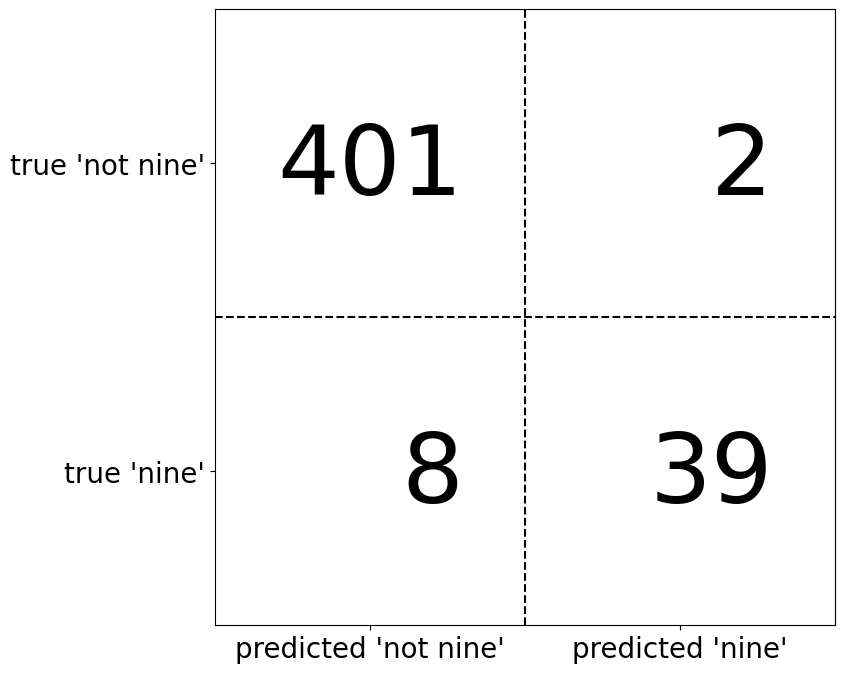

In [6]:
# '9와 9 아님' 분류 문제의 오차 행렬
import mglearn

mglearn.plots.plot_confusion_matrix_illustration()

- 오차 행렬의 대각 행렬은 정확히 분류된 경우이고, 다른 항목은 한 클래스의 샘플들이 다른 클래스로 잘못 분류된 경우가 얼마나 많은지를 알려줌
- 숫자 9를 양성 클래스로 정의하면 오차 행렬의 항목을 앞서 이야기한 거짓 양성과 거짓 음성에 연결할 수 있음
- 전체 그림을 완성하기 위해 양성 클래스로 올바르게 분류한 샘플을 진짜 양성 (True Positive)이라 하고, 음성 클래스로 정확하게 분류한 샘플을 진짜 음성 (True Negative)이라 하겠음
- 이들 용어를 축약해서 FP, FN, TP, TN이라고 쓰며, 오차 행렬에서 다음과 같이 표시

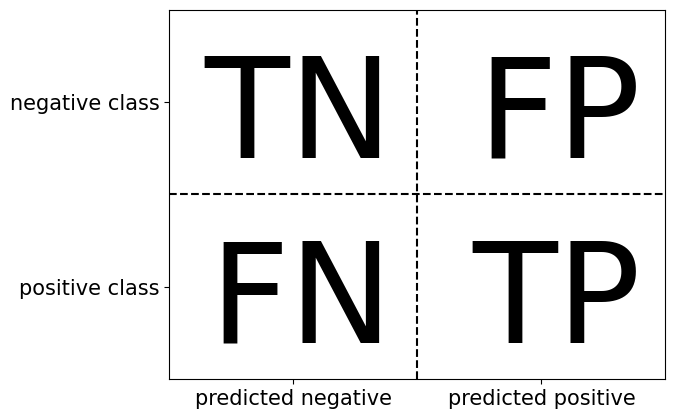

In [7]:
# 이진 분류의 오차 행렬
mglearn.plots.plot_binary_confusion_matrix()

In [8]:
# 오차 행렬을 사용하여 앞서 만든 모델들(더미 모델 두 개, 결정 트리, 로지스틱 회귀)을 비교
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[367  36]
 [ 41   6]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


- 오차 행렬을 보면 pred_most_frequent에서 뭔가 잘못된 것이 확실
- 항상 동일한 클래스를 예측하기 때문
- 반면에 pred_dummy는 특히 거짓 음성(FN)과 거짓 양성(FP)보다 진짜 양성(TP)이 매우 적고(4), 진짜 양성(TP)보다 거짓 양성(FP)이 매우 많음
- 결정 트리의 예측은 더미 분류기보다 정상으로 보이지만, 정확도는 거의 비슷
- 마지막으로 로지스틱 회귀는 모든 면에서 pred_tree보다 나음
- 진짜 양성(TP)과 진짜 거짓(TN)이 더 많은 반면, 거짓 양성(FP)과 거짓 음성(FN)은 적음
- 이렇게 비교하니 결정 트리와 로지스틱 회귀의 결과만 정상이며 로지슽틱 회귀가 모든 항목에서 트리 모델보다 잘 작동했음
- 그러나 전체 오차 행렬을 조사하기는 솔직히 조금 번거로움
- 이 행렬의 모든 면을 살펴보면 많은 정보를 얻을 수 있지만, 매우 수동적이며 정상적인 방법임

- ConfusionMatrixDisplay 클래스는 추정기 객체로부터 오차 행렬을 그리는 from_estimator 함수와 예측 결과로부터 오차 행렬을 그리는 from_predictions 함수를 제공
- 먼저 from_estimator 함수를 사용, 필요한 매개변수는 추정기 객체(여기서는 앞서 훈련한 logreg 객체)와 특성 데이터(X_test), 타깃 데이터(y_test)임
- 클래스 레이블을 별도로 지정하려면 display_labels 매개변수를 사용

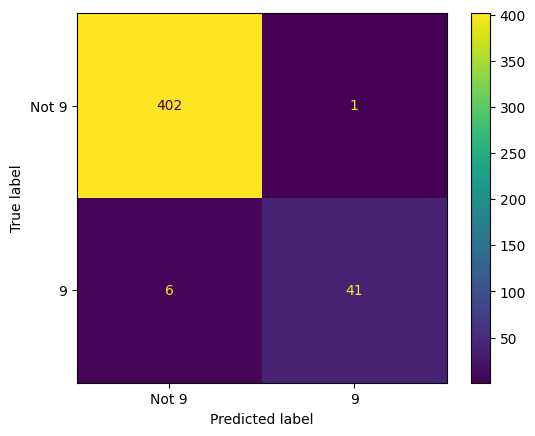

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=["Not 9", "9"])
plt.show();

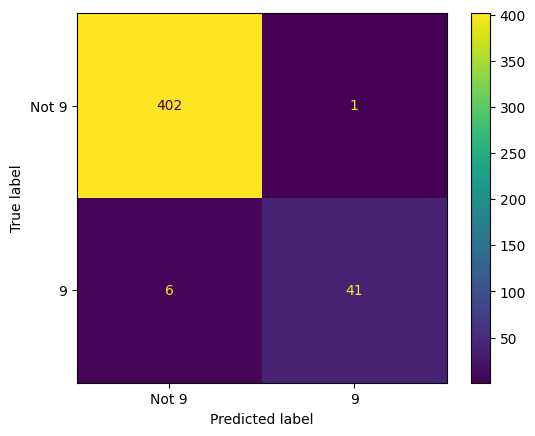

In [10]:
# from_predictions 함수에는 타깃 데이터(y_test)와 추정기로부터 얻은 예측 데이터(pred_logred)를 전달
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels=["Not 9", "9"])
plt.show();

### 정확도와의 관계
- 오차 행렬의 결과를 요약하는 방법으로는 정확도로 표현하는 것
- 정확도는 정확히 예측한 수 (TP와 TN)를 전체 샘플 수(오차 행렬의 모든 항목을 더한 값)로 나눈 것
- 정확도 = (TP + TN) / (TP + TN + FP + FN)

### 정밀도, 재현율, f-점수
- 오차 행렬의 결과를 요약한느 여러 방법 중 가장 일반적인 것은 정밀도(Precision)와 재현율(Recall) 임
- 정밀도는 양성으로 예측된 것(TP + FP) 중 얼마나 많은 샘플이 진짜 양성(TP)인지 측정함
- 정밀도 = TP / (TP + FP)
- 정밀도는 거짓 양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용함
- 예를 들어 임상 실험을 통해 신약의 치료 효과를 예측하는 모델을 생각해보겠음
- 임상 실험은 비싸기로 유명해서 제약 회사의 경우, 단 한번의 실험으로 신약의 효과를 검증하기를 원함
- 그렇기 때문에 모델이 거짓 양성(FP)를 많이 만들지 않는 것이 중요
- 다른 말로 하면 높은 정밀도가 필요. 정밀도는 양성 예측도(PPV)라고도 함
- 한편 재현율은 전체 양성 샘플(TP + FN) 중에서 얼마나 많은 샘플이 양성 클래스(TP)로 분류되는지를 측정
- 재현율 = TP / (TP + FN)
- 재현율은 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용함
- 즉 거짓 음성(FN)을 피하는 것이 중요할 때 임
- 이 장의 앞부분에 나온 암 진단 사례는 이에 해당하는 좋은 예 임
- 건강한 사람이 일부 포함되더라도 암에 걸린 사람을 빠짐없이 찾는 것이 중요
- 재현율을 민감도(Sensitivity), 적중률(Hit Rate), 진짜 양성 비율(TPR)이라고도 함
- 재현율 최적화와 정밀도 최적화는 상충함
- 모든 샘플을 진짜 음성(TN)이 하나도 없고 모두 양성 클래스에 속한다고 예측하면, 거짓 음성(FN)이 없어져 재현율이 완벽해짐
- 하지만 모든 샘플을 양성으로 예측하면 거짓 양성(FP)을 많이 만들고, 따라서 정밀도는 매우 낮아짐
- 다른 한편으로 데이터 포인트 하나만 양성이고 나머지는 음성이라고 예측한다면 정밀도는 (진짜 그 데이터 포인트가 양성이라면) 완벽
- 하지만 재현율은 매우 낮아질 것
- 정밀도와 재현율이 매우 중요한 측정 방법이지만, 둘 중 하나만으로는 전체 그림을 볼 수 없음
- 정밀도와 재현율의 조화 평균인 f-점수(f-score) 또는 f-측정(f-measure)은 이 둘을 하나로 요약해 줌
- F = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
- 특별히 이 공식을 f1-점수라고도 함
- 정밀도와 재현율을 같이 고려하므로 불균형한 이진 분류 데이터셋에서는 정확도보다 더 나은 지표가 될 수 있음
- 앞서 계산한 '9와 9 아님' 데이터셋의 예측에 적용해보겠음
- 여기서 숫자 '9'가 양성 클래스('9'는 True, 나머지는 False 레이블을 가짐)이므로 양성 클래스가 소수(Minority) 클래스임

In [11]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 scoreL {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 scoreL 0.00
무작위 더미 모델의 f1 score: 0.13
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


- 여기서 두 가지를 주목해야 함. 하나는 양성 클래스로 예측된 것이 하나도 없어서 빈도 기반 더미 모델이 에러 메시지를 내뱉음(f1-점수의 분모가 0이 됨)
- 또한 무작위 더미 분류기와 트리 분류기 사이에서도 정확도에는 없던 뚜렷한 차이를 볼 수 있음
- f1-점수를 사용해 평가하면 예측 성능이 다시 하나의 숫자로 요약됨
- 하지만 어떤 모델이 좋은지 직관적으로 판단하는 데는 정확도보다 f1-점수가 나음
- 그러나 f1-점수는 정확도보다 이해하거나 설명하기 어렵다는 게 단점
- classification_report 함수는 정밀도, 재현율, f1-점수 모두를 한 번에 계산해서 깔끔하게 출력

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["Not 9", "9"], zero_division=0))

              precision    recall  f1-score   support

       Not 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



- classification_report 함수는 클래스마다 (여기에서는 True와 False) 한 줄씩 출력을 만들고, 각 클래스가 양성일 때 정밀도, 재현율, f1-점수를 리포트함
- 이전에 소수 클래스인 숫자 '9'를 양성 클래스로 간주했음
- 만약 양성 클래스를 '9 아님'으로 바꾼다면 classification_report 출력에서 볼 수 있듯이 most_frequent 모델의 f1-점수가 0.94임
- 더 나아가 모든 샘플은 '9 아님'으로 분류하기 때문에 '9 아님' 클래스의 재현율이 1임
- f1-점수 오른쪽의 마지막 열은 각 클래스에 대한 지지도(Support)로, 단순히 이 클래스에 있는 진짜 샘플의 수
- 분류 리포트의 마지막 새 줄은 정밀도, 재현율, f1-점수의 평균을 보여줌
- macro avg는 단순히 클래스별 점수의 평균을 계산한 것
- weighted avg는 클래스의 샘플 수로 가중 평균한 것
- 두 클래스를 평균한 것이므로 양성 클래스의 개념이 필요하지 않음
- 양성 클래스의 정밀도나 재현율 점수만 보는 것에 비해 두 클래스를 평균하면 숫자 하나로 된 의미 있는 지표를 얻을 수 있음
- 무작위 더미 분류기와 로지스틱 회귀의 리포트도 확인

In [13]:
print(classification_report(y_test, pred_dummy, target_names=["Not 9", "9"]))

              precision    recall  f1-score   support

       Not 9       0.90      0.91      0.91       403
           9       0.14      0.13      0.13        47

    accuracy                           0.83       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.82      0.83      0.82       450



In [14]:
print(classification_report(y_test, pred_logreg, target_names=["Not 9", "9"]))

              precision    recall  f1-score   support

       Not 9       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



- 무작위 더미 모델과 가장 좋은 성능의 로지스틱 회귀 모델은 그렇게 확연히 차이 나지 않음
- 어떤 클래스를 양성 클래스로 선택하느냐가 이 평가 지표에 큰 영향을 끼침
- 무작위 더미 모델에서 '9'클래스의 f1-점수가 0.12이지만 (로지스틱 회귀는 0.89). '9 아님' 클래스는 각각 0.89와 0.99라서 양쪽 모두 수긍할 만한 결과임
- 하지만 모든 숫자를 함께보면 정확한 판단을 내릴 수 있어 로지스틱 회귀 모델의 우수성을 알 수 있음

### 불확실성 고려
- 오차 행렬과 분류 리포트가 예측 결과를 자세히 분석할 수 있도록 도와줌
- 하지만 예측값은 모델에 담긴 많은 정보가 이미 손실된 상태
- 대부분의 분류기는 예측의 확신을 가늠하기 위한 decision_function이나 predict_proba 메서드를 제공
- 예측을 만들어내는 것은 decision_function이나 predict_proba 출력의 임계값으로 사용함
- 다음 예는 음성 클래스 데이터 포인트 400개와 양성 클래스 데이터 포인트 50개로 이워진 불균형한 이진 분류 문제
- 훈련 데이터는 왼쪽에 나타나 있음
- 이 데이터셋에 커널 SVM을 학습시키고, 훈련 데이터 그래프 오른쪽에 결정 함수 값을 히트맵으로 나타냈음
- 중앙 윗부분에 있는 검은 원은 decision_function이 정확히 0일 때의 임계점을 나타냄
- 이 원 안의 포인트는 양성 클래스로 분류되며 바깥쪽 포인트는 음성 클래스로 분류됨

In [15]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

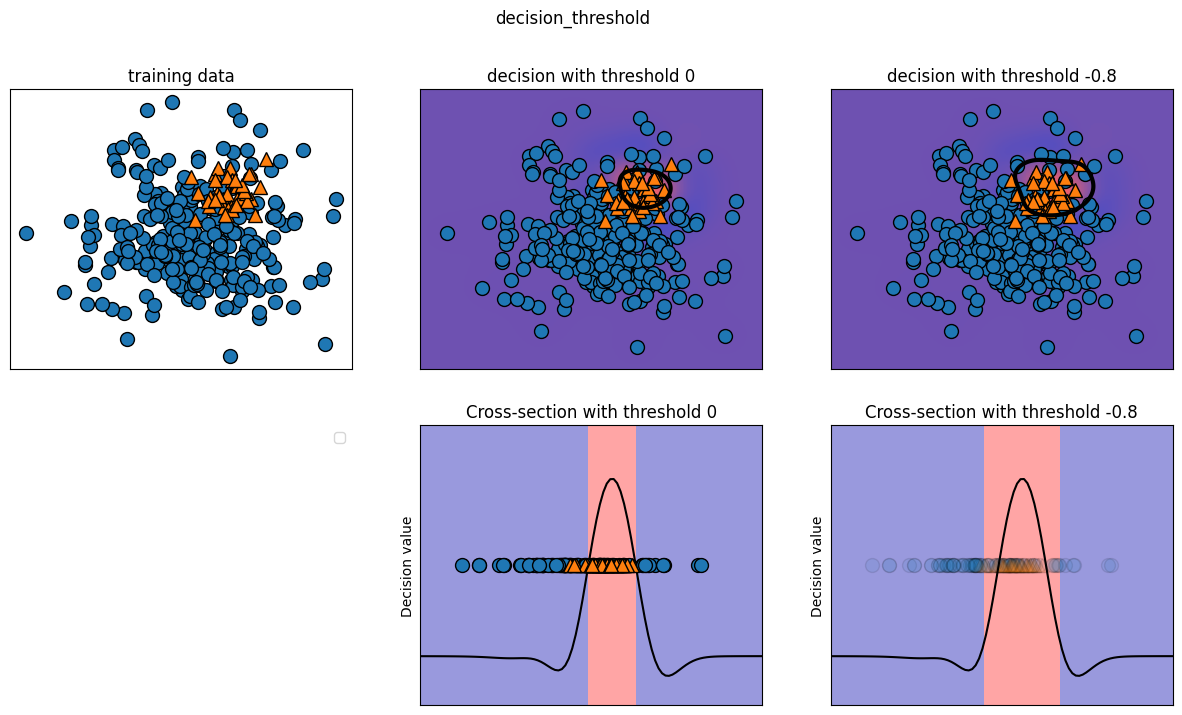

In [16]:
# 결정 함수의 히트맵과 임계값 변화에 따른 영향
mglearn.plots.plot_decision_threshold()

In [17]:
# classification_report 함수를 사용해서 두 클래스의 정밀도와 재현율을 평가
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



- 클래스 1에 대해 상당히 작은 정밀도를 얻었으며 재현율은 절반 정도
- 클래스 0의 샘플이 매우 많으므로 분류기는 소수인 클래스 1보다 클래스 0에 초점을 맞추고 있음
- 이 어플리케이션이 앞의 암 진단 예와 같이 클래스 1의 재현율을 높이는 게 중요하다고 가정해보겠음
- 이 말은 (클래스 1로 잘못 분류된) 거짓 양성(FP)이 늘어나더라도 (재현율을 높이기 위해) 진짜 양성(TP)을 늘리려 한다는 뜻
- svc.predict로 만든 예측은 이 조건을 충족하지 못하지만, 임계값을 바꿔 클래스 1의 재현율을 높이도록 예측을 조정할 수 있음
- 기본적으로 decision_function의 값이 0보다 큰 포인트는 클래스 1로 분류됨
- 더 많은 포인트가 클래스 1로 분류되려면 임계값을 낮춰야 함

In [18]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

In [19]:
# 이 예측 결과의 분류 리포트를 출력
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



- 기대한 대로 클래스 1의 재현율이 높아졌고 정밀도는 낮아졌음
- 재현율보다 정밀도가 중요하거나 그 반대, 또는 데이터가 심하게 불균형일 때 결정 함수의 임계값을 바꾸면 더 나은 결과를 쉽게 얻을 수 있음
- decision_function은 임의의 범위를 가지고 있으므로 임계점을 고르는 일반적인 방법을 제시하기는 어려움
- 임계값을 선택할 때 테스트 세트를 사용하지 않도록 주의를 기울여야 함
- 다른 하이퍼파라미터와 마찬가지로 임계값 설정에 테스트 세트를 사용하면 과도하게 낙관적인 결과를 만들 가능성이 높음
- 대신 검증 세트나 교차 검증을 사용하는 것이 바람직
- 여기서는 간단한 예제를 위해 테스트 세트의 결과를 바탕으로 임계값을 선택했지만 실전에서는 테스트 세트를 사용하면 안 됨
- 다른 매개변수들처럼 테스트 세트에서 결정 임계값을 선택하면 과도하게 낙관적인 결과가 나옴
- 대신 검증 세트나 교차 검증을 사용해야 함
- predict_proba 메서드는 출력이 0에서 1 사이로 고정되니 predict_proba를 제공하는 모델은 임계값을 선택하기가 더 쉬움
- 기본값인 0.5를 임계값으로 설정한 모델은 양성 클래스라는 확신이 50% 이상일 때 양성으로 분류
- 임계값을 높이면 양성 클래스로 분류할 때 더 큰 확신이 있어야 함(음성 클래스는 확신이 덜 필요)
- 임의의 임계값보다는 확률을 사용하는 쪽이 더 직관적이지만, 모든 모델이 쓸모 있는 불확실성을 제공하는 것은 아님(최대 깊이까지 자란 DecisionTree는 비록 잘못된 것이라도  항상 100% 확신)
- 이는 보정(Calibration) 개념과 관련이 있고, 보정된 모델은 불확실성을 정확하게 측정하는 모델임

### 정밀도-재현율 곡선과 ROC 곡선
- 모델의 분류 작업을 결정하는 임계값을 바꾸는 것은 해당 분류기의 정밀도와 재현율의 상충 관계를 조정하는 일
- 예를 들면 양성 샘플의 실수(FN)를 10%보다 작게 하여 90% 이상의 재현율을 원할 수 있음
- 이런 결정은 애플리케이션에 따라 다르며 비즈니스 목표에 따라 결정됨
- 어떤 목표가 선택되면 (즉, 어떤 클래스에 대한 특정 재현율 또는 정밀도의 값) 적절한 임계값을 지정할 수 있음
- 다시 말해 90% 재현율과 같은 특정 목적을 충족하는 임계값을 설정하는 것은 언제든 가능함
- 어려운 부분은 이 임계값을 유지하면서 적절한 정밀도를 내는 모델을 만드는 일
- 만약 모든 것을 양성이라고 분류하면 재현율이 100%가 되지만 이런 모델은 쓸모가 없을 것
- 90% 재현율처럼 분류기의 필요조건을 지정하는 것을 종종 운영 포인트(Operating Point)를 지정한다고 말함
- 운영 포인트를 고정하면 비즈니스 목표를 설정할 때 고객이나 조직 내 다른 그룹에 성능을 보장하는 데 도움이 됨
- 새로운 모델을 만들 때는 운영 포인트가 명확하지 않은 경우가 많음
- 이런 경우에는 문제를 더 잘 이해하기 위해 모든 임계값을 조사해보거나, 한 번에 정밀도나 재현율의 모든 장단점을 살펴보는 것이 좋음
- 이를 위해 정밀도-재현율 곡선(Precision-Recall Curve)을 사용함
- sklearn.metrics 모듈에서 정밀도-재현율 곡선을 만드는 함수를 제공
- 이 함수는 타깃 레이블과 decision_function이나 predict_proba 메서드로 계산한 예측 불확실성을 이용

In [20]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

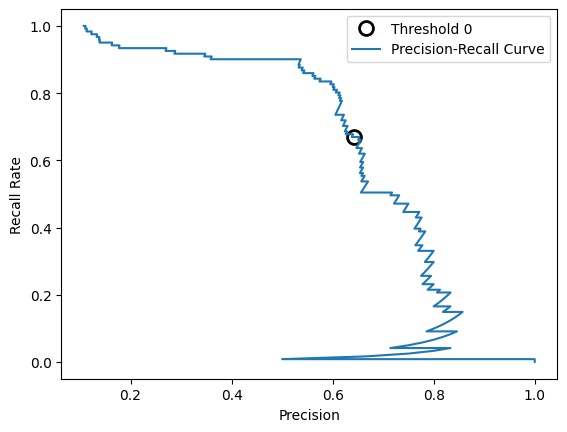

In [21]:
# precision_recall_curve 함수는 가능한 모든 임계값(결정 함수에 나타나느 모든 값)에 대해 정밀도와 재현율의 값을 정렬된 리스트로 반환하므로 곡선 그래프를 그릴 수 있음
# 부드러운 곡선을 위해 데이터 포인트 수를 늘림
# SVC(gamma=0.05)의 정밀도-재현율 곡선
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=0.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾음
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], "o", markersize=10, label="Threshold 0", fillstyle="none", c="k", mew=2)

plt.plot(precision, recall, label="Precision-Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall Rate")
plt.legend(loc="best");

- 곡선의 각 포인트는 decision_function의 가능한 모든 임계값에 대응함
- 이를 테면 정밀도가 약 0.75일 때의 재현율은 0.4임
- 검은 원은 decision_function의 기본 임계값인 0 지점을 나타냄
- 이 지점은 predict 메서드를 호출할 때사용되는 임계값임
- 곡선이 오른쪽 위로 갈수록 더 좋은 분류기임
- 오른쪽 위 지점은 한 임계값에서 정밀도와 재현율이 모두 높은 곳임
- 곡선은 임계값이 매우 낮아 전부 양성 클래스가 되는 왼쪽 위에서 시작함
- 임계값이 커지면서 곡선은 정밀도가 높아지는 쪽으로 이동하지만 재현율은 낮아짐
- 임계값을 높일수록 양성으로 분류된 포인트 대부분이 진짜 양성(TP)이 되며, 정밀도가 매우 높아지지만 재현율은 낮아짐
- 정밀도가 높아져도 재현율이 높게 유지될수록 더 좋은 모델임
- 이 그래프를 조금 더 살펴보면, 재현율을 높게 유지하면서 대략 0.5 정도의 정밀도를 얻을 수 있음
- 더 높은 정밀도를 원한다면 재현율을 크게 손해 봐야 함
- 다른 말로 하면, 이 그래프의 왼쪽은 비교적 평편해서 정밀도가 높아지더라도 재현율이 크게 떨어지지 않음
- 정밀도가 0.5보다 크면 정밀도 증가에 따른 재현율 손실이 커짐
- 분류기가 다르면 곡선의 다른 부분에서 장점이 생기고, 운영 포인트가 달라짐
- 같은 데이터셋으로 훈련한 랜덤 포레스트와 SVM을 비교
- RandomForestClassifier는 decision_function을 제공하지 않고 predict_proba만 가지고 잇음
- 정밀도-재현율 곡선 함수는 양성 클래스(클래스 1)의 확신에 대한 측정값을 두 번째 매개변수로 받음
- 그래서 샘플이 클래스 1일 확률, 즉, rf.predict_proba(X_test)[:, 1]을 넘겨야 함
- 이진 분류에서 predict_proba의 기본 임계값은 0.5이고 곡선에 이 지점을 표시했음

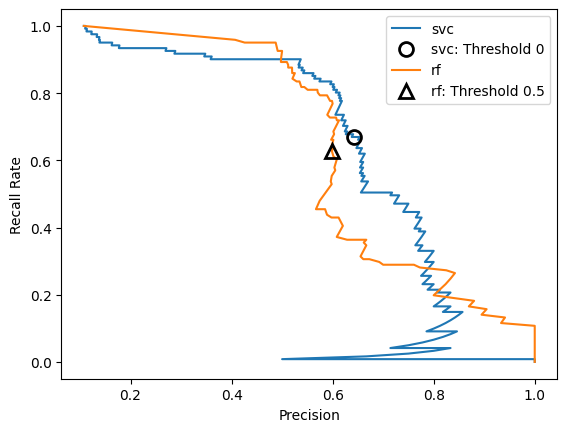

In [22]:
# SVM과 랜덤 포레스트의 정밀도-재현율 곡선 비교
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], "o", markersize=10, label="svc: Threshold 0", fillstyle="none", c="k", mew=2)
plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], "^", c="k", markersize=10, label="rf: Threshold 0.5", fillstyle= "none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall Rate")
plt.legend(loc="best");

- 그래프를 비교해보면 극단적인 부분, 즉 재현율이 매우 높거나 정밀도가 매우 높을 때는 랜덤 포레스트가 더 낫다는 것을 알 수 있음
- 가운데 근처(정밀도=0.7 정도)에서는 SVM이 더 좋음
- 만약f1-점수만으로 전체 성능을 비교한다면 이런 세세한 부분을 놓칠 수 있음
- f1-점수는 정밀도- 재현율 곡선의 한 지점인 기본 임계값에 대한 점수임

In [23]:
print("랜덤 포레스트의 f1_score {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score 0.610
svc의 f1_score: 0.656


- 두 정밀도-재현율 곡선을 비교하면 많은 통찰을 얻을 수 있지만, 확실히 수작업임
- 모델을 자동으로 비교하려면 특정 임계값이나 운영 포인트에 국한하지 않고 전체 곡선에 담긴 정보를 요약해야 함
- 이러한 요약 방법의 하나로 정밀도-재현율 곡선의 아랫부분 면적을 계산할 수 있으며, 이를 평균 정밀도(Average Precision)라고 함
- average_precision_score 함수가 평균 정밀도를 계산해 줌
- 정밀도-재현율 곡선을 계산하고 여러 임계값을 고려해야 하므로, predict 함수가 아니라 decision_function이나 predict_proba 함수의 결괏값을 average_precision_score 함수로 전달해야 함

In [24]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


- 모든 임계값에 대해 평균을 내보면 랜덤 포레스트가 조금 낮지만, SVC와 거의 같은 성능임
- 이는 앞서 본 f1_score의 결과와는 다름
- 평균 정밀도는 0에서 1 사이를 지나는 곡선의 아래 면적이므로 항상 0(가장 나쁨)과 1(가장 좋음) 사이의 값을 반환
- 무작위로 예측하는 분류기의 decision_function의 평균 정밀도는 데이터셋에 있는 양성 클래스의 비율이 됨

- from_estimator 함수를 사용해 필요한 매개변수는 추정기 객체(여기에서는 앞서 훈련한 svc, rf 객체)와 특성 데이터(y_test)임
- SVC와 랜덤 포레스트 그래플르 함께 그리기 위해 matplotlib의 축(Axes) 객체를 ax 매개변수에 전달함

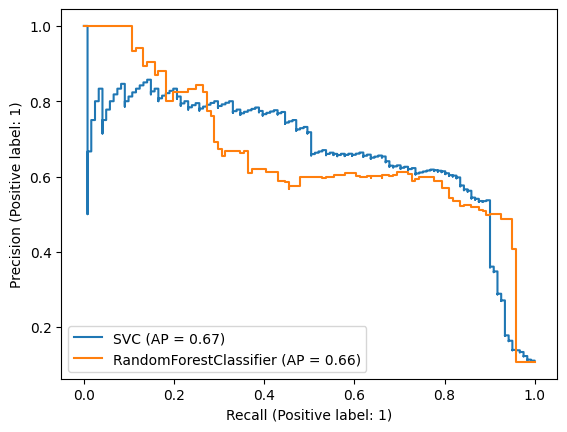

In [25]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, ax=ax)
# 랜덤 포레스트 곡선 그리기
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show();

- 출력된 그래프를 보면 알 수 있듯이 PrecisionRecallDisplay 클래스는 기본적으로 재현율을 X 축에 놓고 정밀도를 y 축에 놓음
- 본문에 있는 그래프처럼 정밀도를 X 축에 놓고 재현율을 y 축에 놓으려면 PrecisionRecallDisplay 클래스에 정밀도와 재현율을 직접 전달해야 함
- 다음 코드에서 보듯이 PrecisionRecallDisplay 클래스의 precision 매개변수와 recall 매개변수에 각각 재현율과 정밀도를 전달
- 이렇게 하면 X 축과 y 축을 서로 바꿔 그릴 수 있음
- PrecisionRecallDisplay 클래스는 기본적으로 X 축 이름을 Recall, y 축 이름을 Precision으로 설정하기 때문에 축 이름을 수동으로 설정했음

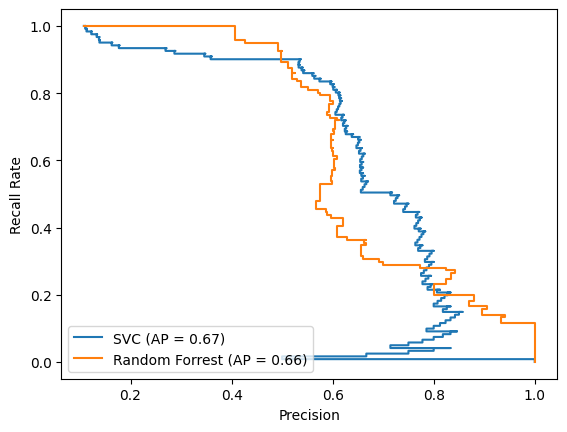

In [26]:
fig, ax = plt.subplots()
# SVC 곡선 그리기
disp = PrecisionRecallDisplay(precision=recall, recall=precision, average_precision=ap_svc, estimator_name="SVC")
disp.plot(ax=ax)
# 랜덤 포레스트 곡선 그리기
disp = PrecisionRecallDisplay(precision=recall_rf, recall=precision_rf, average_precision=ap_rf, estimator_name="Random Forrest")
disp.plot(ax=ax)
ax.set(xlabel="Precision", ylabel="Recall Rate")
plt.show();

### ROC와 AUC
- ROC 곡선은 여러 임계값에서 분류기의 특성을 분석하는 데 널리 사용하는 도구
- 정밀도-재현율 곡선과 비슷하게 ROC 곡선은 분류기의 모든 임계값을 고려하지만, 정밀도와 재현율 대신 진짜 양성 비율(TPR)에 대한 거짓 양성 비율(FPR)을 나타냄
- 진짜 양성 비율은 재현율의 다른 이름이며, 거짓 양성 비율은 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율
- FPR = FP / (FP + TN)

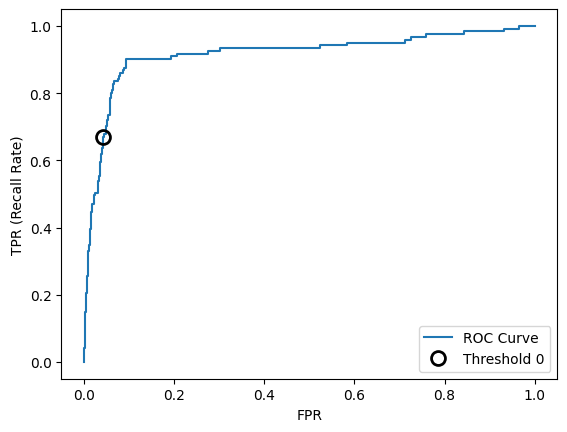

In [27]:
# ROC 곡선은 roc_curve 함수를 사용하여 만들 수 있음
# SVM의 ROC 곡선
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall Rate)")
# 0 근처의 임계값을 찾음
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10, label="Threshold 0", fillstyle="none", c="k", mew=2)
plt.legend(loc=4);

- ROC 곡선은 왼쪽 위에 가까울수록 이상적임
- 거짓 양성 비율(FPR)이 낮게 유지되면서 재현율이 높은 분류기가 좋은 것
- 기본 임계값 0의 지점과 비교했을 때, FPR을 조금 늘리면 재현율을 아주 크게 높일 수 있음(0.7 부근)
- 왼쪽 위에 가장 가까운 지점이 기본값으로 찾은 것보다 더 좋은 운영 포인트
- 여기서도 마찬가지로 임계값을 고르기 위해 테스트 세트를 사용해서는 안 되고 별도의 검증 세트를 활용해야 함

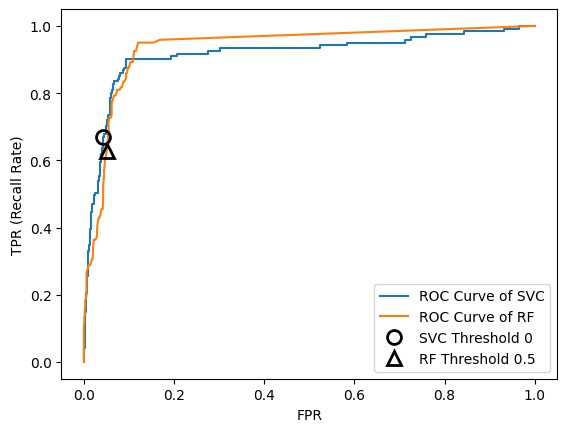

In [28]:
# SVM과 랜덤 포레스트의 ROC 곡선 비교
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve of SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve of RF")

plt.xlabel("FPR")
plt.ylabel("TPR (Recall Rate)")
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10, label="SVC Threshold 0", fillstyle="none", c="k", mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], "^", markersize=10, label="RF Threshold 0.5", fillstyle="none", c="k", mew=2)
plt.legend(loc=4);

- 정밀도-재현율 곡선에서처럼 곡선 아래의 면적값 하나로 ROC 곡선을 요약할 때가 많음(이 면적을 보통 AUC(Area Under the Curve)라고 하며 여기서 곡선(Curve)은 ROC 곡선을 말함)
- ROC 곡선 아래 면적은 roc_auc_score 함수로 계산

In [29]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC of Random Forest: {:.3f}".format(rf_auc))
print("AUC of SVC: {:.3f}".format(svc_auc))

AUC of Random Forest: 0.937
AUC of SVC: 0.916


- AUC 점수로 랜덤 포레스트와 SVM을 비교해보니, 랜덤 포레스트의 성능이 SVM보다 조금 더 나음
- AUC가 0과 1 사이의 곡선 아래 면적이므로 항상 0(최악)과 1(최선) 사이의 값을 가짐
- 데이터셋에 담긴 클래스가 아무리 불균형하더라도 무작위로 예측한 AUC 값은 0.5가 됨
- 그래서 불균형한 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표임
- AUC는 양성 샘플의 순위를 평가하는 것으로 볼 수 있음
- 이는 분류기에서 무작위로 선택한 양성 클래스 포인트의 점수가 무작위로 선택한 음성 클래스 포인트의 점수보다 높을 확률과 같음
- 그래서 AUC가 1일 때는 모든 양성 포인트의 점수가 모든 음성 포인트의 점수보다 높음
- 불균형한 클래스를 분류하는 문제에서 모델을 선택할 때는 정확도보다 AUC가 훨씬 의미있는 정보를 제공

- RocCurveDisplay 클래스는 추정기 객체를 사용하는 from_estimator 함수와 예측 결과를 사용하는 from_predictions 함수를 제공
- from_estimator 함수에 필요한 매개변수는 추정기 객체(여기에서는 앞서 훈련한 svc, rf 객체)와 특성 데이터(X_test), 타깃 데이터(y_test)임
- SVC와 랜덤 포레스트 그래프를 함께 그리기 위해 matplotlib의 축(Axes) 객체를 ax 매개변수에 전달해 줌

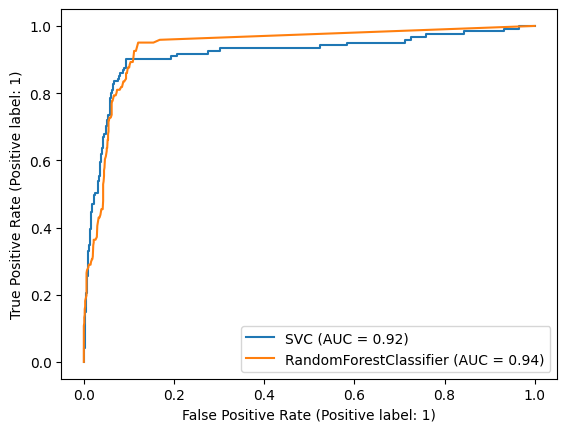

In [30]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)
# 랜덤 포레스트 곡선 그리기
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show();

- from_predictions 함수를 사용할 때는 타깃 데이터(y_test)와 추정기의 decision_function 메서드 predict_proba 메서드의 반환값을 전달
- from_predictions 함수는 기본적으로 추정기 이름을 'Classifier'로 설정
- 두 모델의 곡선을 구분하기 쉽도록 name 매개변수에 SVC와 랜덤 포레스트 이름을 전달

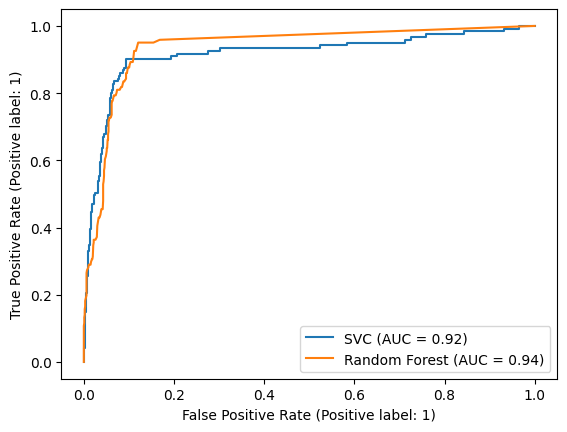

In [31]:
fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_predictions(y_test, svc.decision_function(X_test), name="SVC", ax=ax)
# 랜덤 포레스트 곡선 그리기
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[:, 1], name="Random Forest", ax=ax)
plt.show();

- 앞서 본 digits 데이터셋에서 9와 다른 숫자를 구분하는 문제를 다시 보도록 하겠음
- 커널 폭 gamma를 각기 다르게 한 SVM을 이 데이터셋에 적용

gamma = 1.00   정확도 = 0.90   AUC = 0.50
gamma = 0.10   정확도 = 0.90   AUC = 0.96
gamma = 0.01   정확도 = 0.90   AUC = 1.00


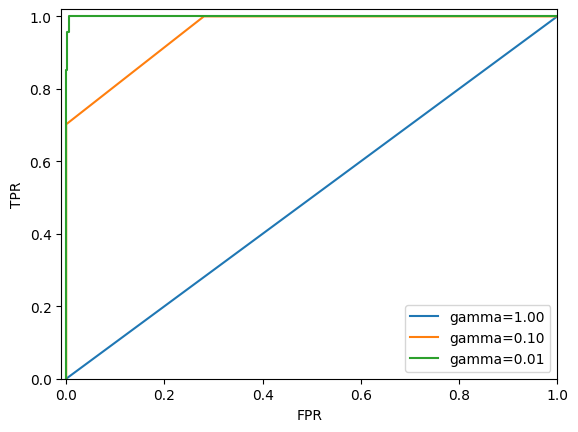

In [32]:
# 각기 다른 gamma를 가진 SVM의 ROC 곡선 비교
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
  svc = SVC(gamma=gamma).fit(X_train, y_train)
  accuracy = svc.score(X_test, y_test)
  auc = roc_auc_score(y_test, svc.decision_function(X_test))
  fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
  print("gamma = {:.2f}   정확도 = {:.2f}   AUC = {:.2f}".format(gamma, accuracy, auc))
  plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best");

- 세 가지 gamma 값에 대한 정확도는 90%로 모두 같음
- 이는 우연히 성능이 같은 것일 수도 있고 아닐 수도 있음
- 그러나 AUC와 ROC 곡선을 보면 세 모델의 차이가 뚜렷하게 확인됨
- gamma = 1.0에서 AUC는 무작위로 선택한 수준, 즉 decision_function의 출력이 무작위 선택과 다를 바가 없음
- gamma = 0.1에서는 AUC 값이0.96으로 크게 향상되었음
- 마지막으로 gamma=0.01에서 완벽한 AUC 값인 1을 얻었음
- 즉 결정 함수에 의해서 모든 양성 포인트는 어떤 음성 포인트보다 더 높은 점수를 가짐
- 다르게 말하면 적절한 임계값에서 이 모델은 데이터를 완벽하게 분류할 수 있음
- 이 사실은 이 모델에서 임계값을 조정해서 아주 높은 예측 성능을 얻을 수 있음을 말함
- 정확도만 사용한다면 이런 점을 결코 발견하지 못할 것
- 이런 이유로 불균형한 데이터셋에서 모델을 평가할 때는 AUC를 사용하라고 강력히 권함
- 하지만 AUC 값이 기본 임계값과는 상관없으므로, AUC가 높은 모델에서 좋은 분류 결과를 얻으려면 결정 임계값을 조정해야 함

## 3-3. 다중 분류의 평가 지표
- 이진 분류 평가에 대해 자세히 보았으니, 이제 다중 분류를 평가하는 지표를 알아보겠음
- 기본적으로 다중 분류를 위한 지표는 모두 이진 분류 평가 지표에서 유도되었으며, 다만 모든 클래스에 대해 평균을 낸 것
- 다중 분류의 정확도도 정확히 분류된 샘플의 비율로 정의함
- 그래서 클래스가 불균형할 때는 정확도는 좋은 평가 방법이 되지 못함
- 85% 포인트가 클래스 A에 속하고, 10% 클래스 B, 5%는 클래스 C에 속한 삼중 클래스 분류 문제를 생각해보겠음
- 이 데이터셋에서 정확도가 85%라는 것은 일반적으로 어떤 의미일까? 일반적으로 다중 분류의 결과는 이진 분류 결과보다 이해하기 어려움
- 다중 분류의 평가에는 정확도 외에 앞 절의 이진 분류에서 사용한 오차 행렬 분류 리포트 등을 일반적으로 사용
- 이 두 평가 방법을 digits 데이터셋의 10개 손글씨 숫자를 분류하는 데 적용

In [33]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


- 이 모델의 정확도는 95.3%로 꽤 좋은 성능을 냄
- 오차 핼렬에는 더 자세한 내용이 담겨져있음
- 이진 분류에서처럼 각 행은 정답 레이블에 해당하며, 열은 예측 레이블에 해당

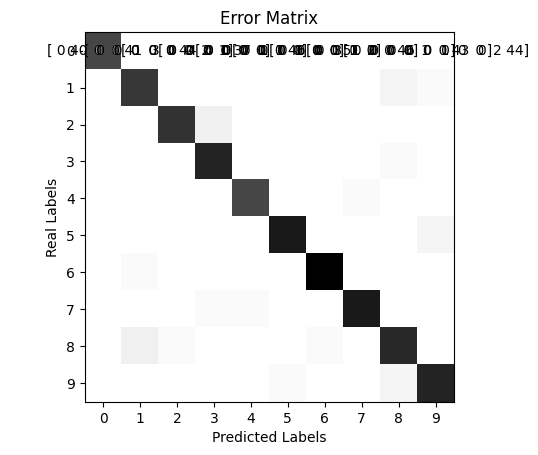

In [34]:
# 10개 숫자 분류 문제의 오차 행렬
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel="Predicted Labels", ylabel="Real Labels", xticklabels=digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%s")
plt.title("Error Matrix")
plt.gca().invert_yaxis();

- 첫 번째 클래스인 숫자 0은 샘플이 총 37개이며, 모두 클래스 0으로 분류(클래스 0에는 거짓 음성(FN)이 없음)
- 오차 행렬의 첫 번째 행에서 다른 항목들이 모두 0이기 때문
- 또한 오차 행렬의 첫 번째 열의 다른 항목들이 모두 0이므로(클래스 0에는 거짓 양성(FP)이 없으므로), 클래스 0으로 잘못 분류한 숫자가 하나도 없음
- 하지만 어떤 숫자들은 잘못 분류한 것도 있음
- 예를 들면, 숫자 2(세 번째 행) 중 세 개를 숫자 3(네 번째 열)으로 분류
- 그리고 숫자 3 하나를 2로 분류했고(네 번째 행 세 번째 열), 숫자 8 세 개를 1로 분류(아홉 번째 행 두 번째 열)

In [35]:
# classification_report 함수를 사용해서 정밀도, 재현율, f1-점수를 계산
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



- 당연하지만 숫자 0에는 오차가 없으므로 클래스 0의 정밀도와 재현율은 모두 1로 완벽
- 한편 클래스 7은 다른 클래스가 7로 잘못 분류한 것이 없어서 정밀도가 1이고, 클래스 6은 거짓 음성(FN)이 없어서 재현율이 1임
- 이 모델은 클래스 1, 3, 8을 분류하는 데 어려움을 겪고 있음
- 다중 분류에서 불균형 데이터셋을 위해 가장 널리 사용하는 평가 지표는 f1-점수의 다중 분류 버전
- 다중 클래스용 f1-점수는 한 클래스를 양성 클래스로 두고 나머지 클래스들을 음성 클래스로 간주하여 클래스마다 f1-점수를 계산
- 그런 다음, 클래스별 f1-점수를 다음 전략 중 하나를 사용하여 평균을 냄
- "macro" 평균은 클래스별 f1-점수에 가중치를 주지 않음. 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룸
- "weighted" 평균은 클래스별 샘플 수로 가중치를 두어 f1-점수의 평균을 계산
- "micro" 평균은 모든 클래스의 거짓 양성(FP), 거짓 음성(FN), 진짜 양성(TP)의 총 수를 헤아린 다음 정밀도, 재현율, f1-점수를 이 수치로 계산함
- 각 샘플을 똑같이 간주한다면 "micro" 평균 f1-점수를 추천
- 각 클래스를 동일한 비중으로 고려한다면 "macro" 평균 f1-점수를 추천

In [36]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


## 3-4. 회귀의 평가 지표
- 회귀 평가는 분류에서와 비슷하게 할 수 있음
- 예를 들면, 타깃을 과대 예측한 것 대비 과소 예측한 것을 분석
- 그러나 대부분의 애플리케이션에서는 회귀 취정기의 score 메서드에서 이용하는 R^2만으로 충분함
- 가끔 평균 제곱 에러나 평균 절댓값 에러를 사용하여 모델을 튜닝할 때 이런 지표를 기반으로 비즈니스 결정을 할 수 있음
- 그러나 일반적으로 R^2이 회귀 모델을 평가하는 데 더 나은 지표

## 3-5. 모델 선택에서 평가 지표 사용
- 많은 평가 방법과 그 방법들을 주어진 타깃 값과 모델에 어떻게 적용하는지 자세히 다루었음
- 그러나 GridSearchCV나 cross_val_score를 사용하여 모델을 선택할 때, AUC 같은 평가 지표를 사용하고 싶은 경우가 많이 있음
- 다행히 scikit-learn에서는 GridSearchCV와 cross_val_score의 scoring 매개변수를 통해 손쉽게 이를 구현할 수 있음
- 사용하려는 평가 지표를 문자열로 넘겨주기만 하면 됨
- 예를 들어 digits 데이터셋을 가지고 "9와 9 아님"을 분류하는 SVM 모델을 평균 정밀도 점수로 평가
- 기본값(정확도)에서 평균 정밀도로 바꾸려면 scoring 매개변수에 average_precision이라고 지정하면 됨

In [42]:
# 분류의 기본 평가 지표는 정확도
from sklearn.model_selection import cross_val_score

print("기본 평가 지표:", cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
# scoring="accuracy"의 결과는 같음
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc", cv=5)
print("평균 정밀도 지표:", roc_auc)

기본 평가 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
평균 정밀도 지표: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [44]:
# cross_validate 함수를 사용하면 한 번에 여러 측정 지표를 계산할 수 있음
from sklearn.model_selection import cross_validate
import pandas as pd

res = cross_validate(SVC(), digits.data, digits.target == 9, scoring=["accuracy", "roc_auc", "recall_macro"], return_train_score=True, cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.010526,0.020103,0.975000,0.994433,0.997171,0.998679,0.887346,0.972222
1,0.014467,0.012066,0.991667,0.995825,0.998543,0.999141,0.958333,0.982252
2,0.006440,0.013505,1.000000,0.995132,1.000000,0.998975,1.000000,0.978780
3,0.005102,0.017343,0.994429,0.995828,0.999828,0.998825,0.972222,0.982252
4,0.008644,0.009617,0.980501,0.996523,0.984004,0.999914,0.902778,0.985725


In [48]:
# 비슷하게 GridSearchCV에서 최적의 매개변수를 선택하기 위한 평가 지표를 바꿀 수 있음
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만듦
param_grid = {"gamma": [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수(정확도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수(정확도): 0.972
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [49]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision", cv=3)
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수(평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수(평균 정밀도): 0.985
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.996


- 정확도를 사용할 때는 gamma=0.001이 선택되지만, 평균 정밀도를 사용하면 gamma=0.01이 선택됨
- 두 경우 모두 교차 검증 점수가 테스트 세트에 대한 결과와 일치함
- 평균 정밀도를 최적화하기 위해 찾은 매개변수에서는 테스트 세트의 평균 정밀도가 더 높음
- 반면 정확도를 최적화하기 위해 찾은 매개변수에서는 테스트 세트의 정확도가 더 높음
- 분류 문제에서 scoring 매개변수의 중요한 옵션은 accuracy(기본값)
- ROC 곡선의 아래 면적인 roc_auc, 정확도-재현율 곡선의 아래 면적인 average_precision, 이진f1-점수인 f1과 가중치 방식에 따라 f1_macro, f1_micro, f1_weighted가 있음
- 회귀에서 가장 널리 사용하는 것은 R^2 점수를 나타내는 r2, 평균 제곱 오차인 neg_mean_squared_error, 평균 절댓값 오차인 neg_mean_absolute_error임

# 4. 요약 및 정리
- 이번 장에서 교차 검증, 그리드 서치, 평가 지표와 머신러닝 알고리즘을 평가하고 개선하기 위한 기초 사항을 살펴보았음
- 이 장에서 논의한 도구들과 앞선 알고리즘들은 모든 머신러닝 개발자의 필수 도구임
- 초보 기술자가 간과하기 쉽기 때문에 이 장에서 나온 주의 사항 두 개를 다시 환기시킴
- 1) 교차 검증을 해야 함
- 교차 검증 또는 테스트 세트를 사용하면 머신러닝 모델의 미래 성능을 평가할 수 있음
- 하지만 테스트 세트나 교차 검증을 모델이나 모델의 매개변수 선택에 사용하면 (테스트 데이터를 써버렸기 때문에) 테스트 데이터로 미래 성능을 평가했을 때 매우 낙관적인 예측치를 얻게 됨
- 그러므로 모델 학습에는 훈련 데이터로, 모델과 매개변수 선택에는 검증 데이터로, 모델 평가에는 테스트 데이터로 분리해서 사용해야 함
- 간단하게 한 번만 분리하는 대신 교차 검증으로 분할을 반복함
- 가장 널리 사용하는 구성은 훈련 세트와 테스트 세트로 분할하고 모델과 모델 매개변수 선택을 위해 훈련 세트에 교차 검증을 적용하는 방식
- 2) 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요함
- 머신러닝 작업의 최종 목적이 높은 정확도의 모델을 만드는 데에서 끝나는 일은 거의 없음
- 모델을 평가하고 선택하기 위한 지표가 이 모델이 실제로 사용되는 상황을 잘 대변해야 함
- 실전에서는 분류 문제에 균형 잡힌 클래스를 가진 경우가 거의 없고, 거짓 양성(FP)과 거짓 음성(FN)이 매우 큰 영향을 미침
- 이런 영향을 이해하고 적절한 평가 지표를 선택해야 함
- 지금까지 언급한 모델 평가와 선택 기술은 데이터 과학자의 도구 상자에서 가장 중요한 것들임
- 이 장에서 설명한 그리드 서치와 교차 검증은 지도 학습 모델 하나에만 적용했음
- 그러나 우리가 보았듯이 많은 모델이 전처리를 필요로 함
- 얼굴 인식 예와 같이 어떤 애플리케이션에서는 데이터의 표현을 다르게 만드는 것이 도움이 됨